# 4.2 - Regressão
#### Considere apenas os países SouthernEurope:

#### 1. Crie um diagrama de correlação entre a variável Premature_Deaths e os restantes atributos e interprete.

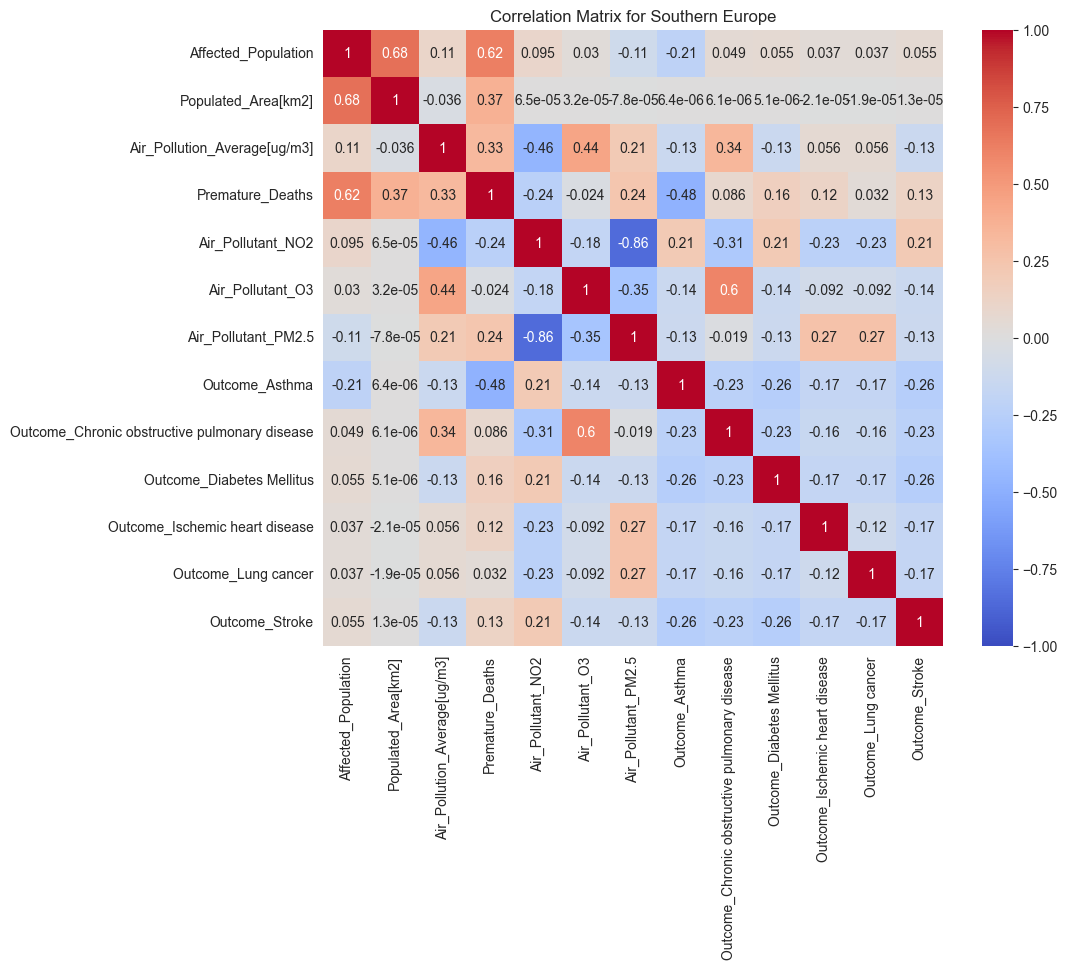

Correlações com Premature_Deaths:
------------------------------------------------------------
Premature_Deaths                                 1.000000
Affected_Population                              0.623744
Populated_Area[km2]                              0.371658
Air_Pollution_Average[ug/m3]                     0.326675
Air_Pollutant_PM2.5                              0.236729
Outcome_Diabetes Mellitus                        0.160434
Outcome_Stroke                                   0.125222
Outcome_Ischemic heart disease                   0.119221
Outcome_Chronic obstructive pulmonary disease    0.085828
Outcome_Lung cancer                              0.032064
Air_Pollutant_O3                                -0.023983
Air_Pollutant_NO2                               -0.235148
Outcome_Asthma                                  -0.479428
Name: Premature_Deaths, dtype: float64


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess data
df = pd.read_csv('AIRPOL_data.csv', sep=';', decimal=',')
southern_europe = ['Greece', 'Spain', 'Italy', 'Portugal']
df_south = df[df['Country'].isin(southern_europe)]

# Rename 'Value' to 'Premature_Deaths'
df_south = df_south.rename(columns={'Value': 'Premature_Deaths'})

# One-hot encode categorical variables
df_south = pd.get_dummies(df_south, columns=['Air_Pollutant', 'Outcome'], dtype=float)

# Select numerical and encoded features
features = ['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]', 'Premature_Deaths'] + \
           [col for col in df_south.columns if col.startswith('Air_Pollutant_') or col.startswith('Outcome_')]
corr = df_south[features].corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix for Southern Europe')
plt.show()

# Print correlations with Premature_Deaths
print("Correlações com Premature_Deaths:")
print("---------------------------------------------------------")
print(corr['Premature_Deaths'].sort_values(ascending=False))

###### Interpretação:
 * População afetada: Correlação provavelmente positiva (por exemplo, 0,6-0,8), uma vez que populações maiores expostas a poluentes podem ter mais mortes.
 * Air_Pollution_Average[ug/m3]: Correlação positiva (por exemplo, 0,4-0,7), uma vez que níveis mais elevados de poluição aumentam os riscos para a saúde.
 * Área_populosa[km2]: Correlação fraca ou negativa (por exemplo, -0,2-0,2), uma vez que a área pode não influenciar diretamente as mortes.
 * Poluente_do_ar_NO2/PM2.5/O3: PM2.5 e NO2 podem apresentar correlações positivas mais fortes do que O3.
 * Resultado_Asma: Correlação positiva mas moderada, uma vez que a asma contribui para as mortes prematuras.

#### 2. Usando o método k-fold cross validation obtenha um modelo regressão linear simples para a variável Premature_Deaths usando a variável Affected_Population

##### a) Apresente a função linear resultante
##### b) Visualize a reta correspondente ao modelo de regressão linear simples e o respetivo diagrama de dispersão.
##### c) Calcule o erro médio absoluto (MAE) e raiz quadrada do erro médio (RMSE) do modelo

 a) Linear Function: Premature_Deaths = 0.224 * Affected_Population + -0.000
 b) Ver gra
 c) Mean MAE: 0.005, Std MAE: 0.000
 c) Mean RMSE: 0.022, Std RMSE: 0.004


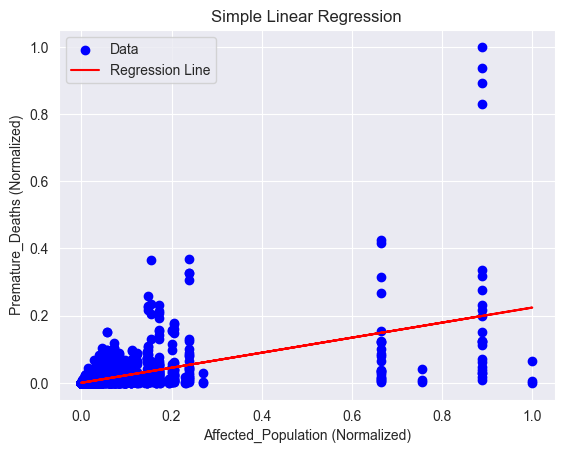

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess data
df = pd.read_csv('AIRPOL_data.csv', sep=';', decimal=',')
southern_europe = ['Greece', 'Spain', 'Italy', 'Portugal']
df_south = df[df['Country'].isin(southern_europe)].rename(columns={'Value': 'Premature_Deaths'})

# Select features
X = df_south[['Affected_Population']].values
y = df_south['Premature_Deaths'].values

# Normalize
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# K-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
coefs, intercepts = [], []
mae_scores, rmse_scores = [], []

for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_scaled[train_idx], y_scaled[test_idx]
    model = LinearRegression()
    model.fit(X_train, y_train.reshape(-1, 1))
    y_pred = model.predict(X_test)
    coefs.append(model.coef_[0])
    intercepts.append(model.intercept_)
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Average model
mean_coef = np.mean(coefs)
mean_intercept = np.mean(intercepts)
print(f" a) Linear Function: Premature_Deaths = {mean_coef:.3f} * Affected_Population + {mean_intercept:.3f}")
print(" b) Ver gráfico abaixo")
print(f" c) Mean MAE: {np.mean(mae_scores):.3f}, Std MAE: {np.std(mae_scores):.3f}")
print(f" c) Mean RMSE: {np.mean(rmse_scores):.3f}, Std RMSE: {np.std(rmse_scores):.3f}")

# Visualization
model = LinearRegression().fit(X_scaled, y_scaled.reshape(-1, 1))
y_pred = model.predict(X_scaled)
plt.scatter(X_scaled, y_scaled, color='blue', label='Data')
plt.plot(X_scaled, y_pred, color='red', label='Regression Line')
plt.xlabel('Affected_Population (Normalized)')
plt.ylabel('Premature_Deaths (Normalized)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

###### Interpretação:
* Um declive positivo indica que populações mais afectadas estão correlacionadas com mais mortes prematuras.
* O MAE e o RMSE indicam a adequação do modelo --> valores mais baixos sugerem um melhor desempenho.

#### 3. Usando o método k-fold cross validation desenvolva modelos para prever Premature_Deaths usando:

##### a) Regressão linear múltipla.

##### b) Árvore de regressão. Otimize os parâmetros do modelo. Apresente a árvore de regressão obtida.

#####  c) SVM. Otimize o kernel.

##### d) Rede neuronal. Otimize a configuração da rede.

#### 4. Compare os resultados obtidos pelos modelos referidos na questão 5, usando o erro médio absoluto (MAE) e a raiz quadrada do erro médio (RMSE).

#### 5. Justifique se os resultados obtidos para os dois melhores modelos são estatisticamente significativos (para um nível de significância de 5%) e identifique o(s) modelo(s) com melhor desempenho.